# **Project Name**    -

**amazon prime Tv shows and Movies**


##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member  -**saiprakash


# **Project Summary -**
This project explores the Amazon Prime dataset containing information about TV shows and movies, including details such as titles, cast, directors, genres, countries, release years, and ratings. The main goal of this project is to derive insights and trends from the dataset by cleaning and analyzing the data using Python libraries such as Pandas, Seaborn, and Matplotlib.

# **GitHub Link -**

 Import the required Python libraries

In [3]:
# Ensure this cell is executed before any cell that uses 'pd', 'np', 'sns', or 'plt'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read Data

In [4]:
# Read Data

data = pd.read_csv('/content/credits.csv.zip')

data = pd.read_csv('/content/titles.csv.zip')

data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


Dropping the unnecessary columns

In [ ]:
data.drop(['show_id'], axis = 1, inplace = True)
data.drop(['description'], axis = 1, inplace = True)

 Checking for duplicated

In [ ]:
data.duplicated().sum()

0

Get informations about dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7586 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    155 non-null    object
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


Describe numaric data

In [ ]:
data.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


Describe unnumaric data

In [ ]:
data.describe(include = object)

,type,title,director,cast,country,date_added,rating,duration,listed_in
count,9668,9668,7586,8435,672,155,9331,9668,9668
unique,2,9668,5774,7927,86,84,24,219,518
top,Movie,"Fighter, Marbo Noy Morbo",Mark Knight,Maggie Binkley,United States,"March 30, 2021",13+,1 Season,Drama
freq,7814,1,113,56,253,14,2117,1342,986


 Checking for total null values

In [ ]:
data.isna().sum()

type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
dtype: int64

Fill the null values

In [ ]:
data['director'].fillna('Unavailable', inplace=True)
data['cast'].fillna('Unavailable', inplace=True)
data['country'].fillna('Unavailable', inplace=True)
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])
data['date_added']= data['date_added'].ffill()

Get the summary of dataframe

In [ ]:
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"


In [ ]:
data.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

changing the datatype of the date and filling the missing values in date column using forward fill

In [ ]:
data['date_added']= pd.to_datetime(data['date_added'], format='%B %d, %Y')


In [ ]:
# Exclude rows where the director is "Unknown"
filtered_directors = data[data['director'] != 'Unavailable']
top_directors = filtered_directors['director'].value_counts().head(10)

# Exclude rows where the cast is "Unknown"
filtered_actors = data[data['cast'] != 'Unavailable']
top_actors = filtered_actors['cast'].value_counts().head(10)


Find Top 10 Prolific Actors Excluding Unknown using barplot diagram

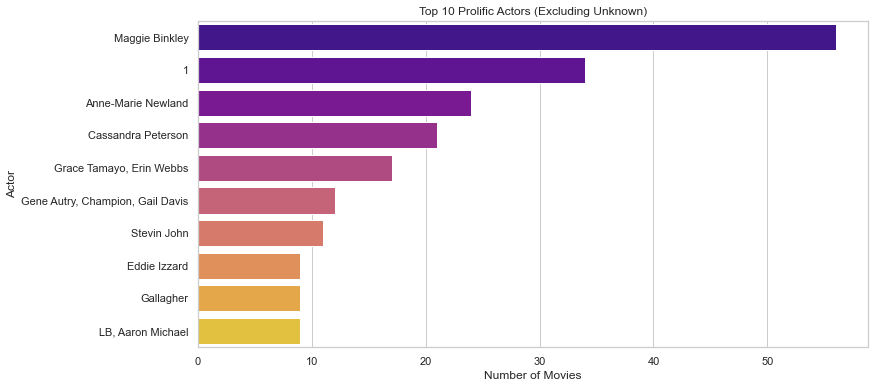

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='plasma')
plt.title('Top 10 Prolific Actors (Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

Find Top 10 Genres  using barplot diagram

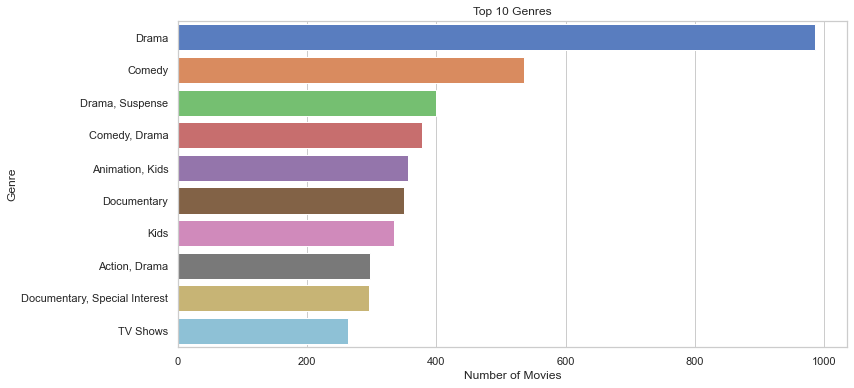

In [ ]:
# Top genres
top_genres = data['listed_in'].value_counts().head(10)

# Plot Top Genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted')
plt.title('Top 10 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

Get counts of all values of release_year

In [ ]:
data['release_year'].value_counts()

2021    1442
2020     962
2019     929
2018     623
2017     562
        ... 
1926       2
1922       2
1927       1
1923       1
1924       1
Name: release_year, Length: 100, dtype: int64

Using seaborn displot we can see the distribution in years

Text(0.5, 1.0, 'Number of Films over the years')

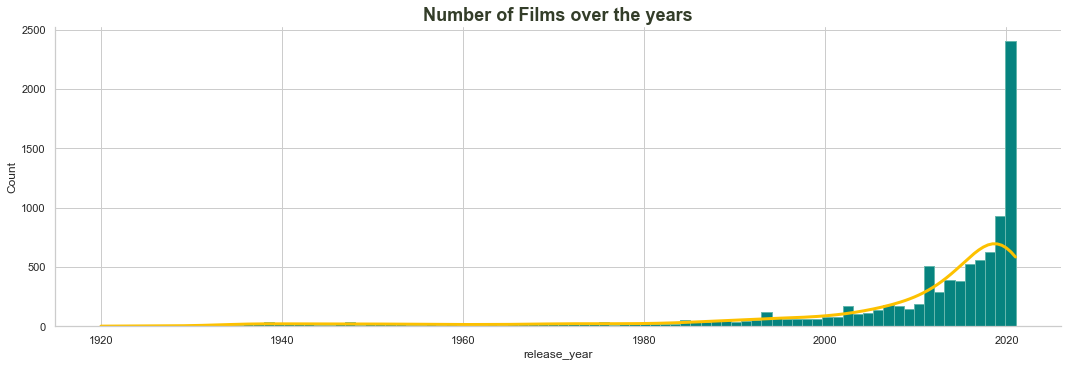

In [ ]:

sns.displot(data=data, x='release_year', kind='hist', kde=True,
            color='#fdc100', facecolor='#06837f', edgecolor='#64b6ac', line_kws={'lw': 3}, aspect=3)
plt.title('Number of Films over the years', fontsize=18, weight=600, color='#333d29')

In [ ]:
data['type'].value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

 To know about whether movie is more or TV Show using countplot

<AxesSubplot:xlabel='type', ylabel='count'>

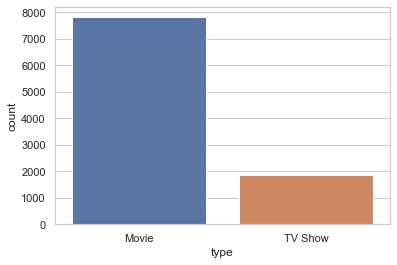

In [ ]:
sns.countplot(data=data,x='type')


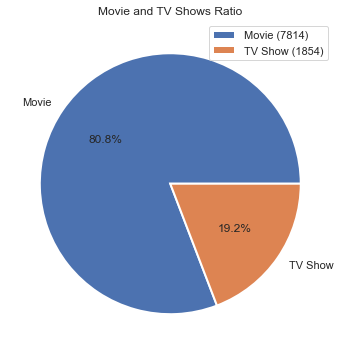

In [ ]:
df_pie = data['type'].copy().value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    x=df_pie.values,labels=df_pie.index,autopct='%.1f%%',
    wedgeprops={'linewidth':2.0,'edgecolor':'white'}
    )
plt.title('Movie and TV Shows Ratio')
plt.legend(labels=[f"{label} ({count})" for label, count in zip(df_pie.index, df_pie.values)],loc='best')
plt.show()

In [ ]:
data['rating'].value_counts()

13+         2454
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
NOT_RATE       3
AGES_18_       3
AGES_16_       2
16             1
ALL_AGES       1
Name: rating, dtype: int64

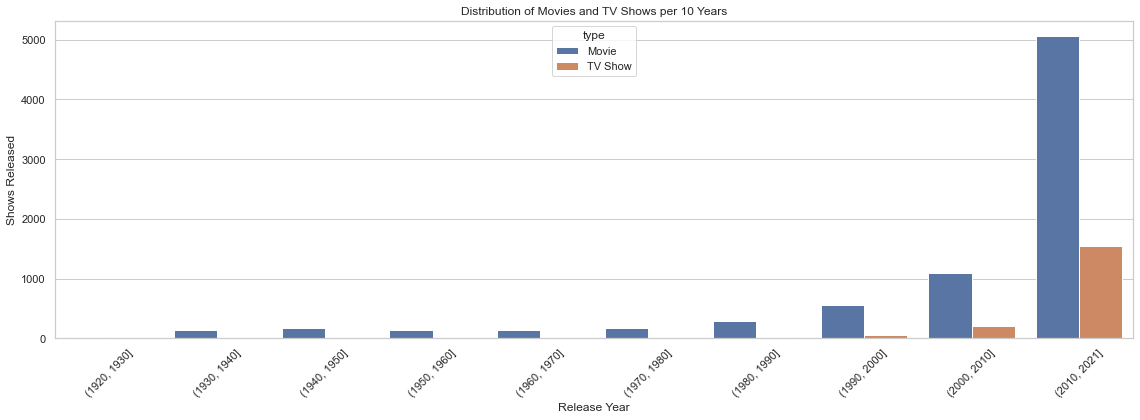

In [ ]:
fig = plt.figure(figsize=(16, 6))

# Create bins for countplot
bins = []
for i in range(1920, 2022, 10):
    if i == 2020:
        i = 2021
    bins.append(i)

df_count = data[['type', 'release_year']].copy()
df_count.loc[:, 'release_year_bins'] = pd.cut(df_count['release_year'], bins)

sns.countplot(data=df_count, x='release_year_bins', hue='type')
plt.xticks(rotation=45)
plt.title('Distribution of Movies and TV Shows per 10 Years')
plt.ylabel('Shows Released')
plt.xlabel('Release Year')
fig.set_tight_layout(True)
plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

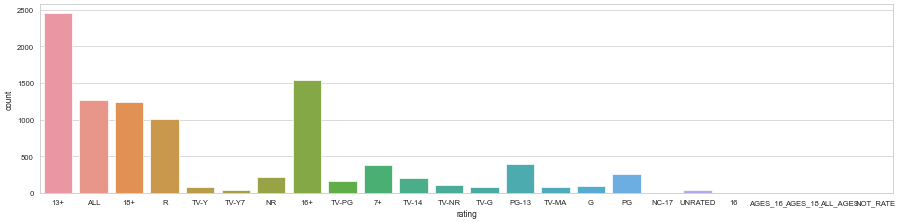

In [ ]:
plt.figure(figsize=(22,5),dpi = 50)
sns.countplot(data=data,x='rating')

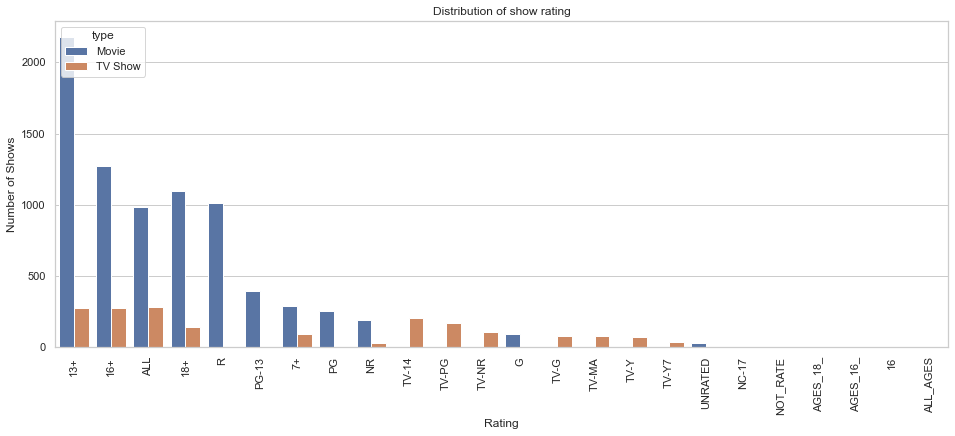

In [ ]:
#countplot
data_count1=data['rating'].value_counts().reset_index()
plt.figure(figsize=(16,6))
sns.countplot(x='rating',data=data,hue='type',order=data['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of show rating')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.show()

In [ ]:
data['director'].value_counts()

Unavailable              2082
Mark Knight               113
Cannis Holder              61
Moonbug Entertainment      37
Jay Chapman                34
                         ... 
Michael Schoemann           1
David Slade                 1
Mike Dunkin                 1
John Elbert Ferrer          1
Jim Conover                 1
Name: director, Length: 5775, dtype: int64

In [ ]:
data['duration'].unique()

array(['113 min', '110 min', '74 min', '69 min', '45 min', '52 min',
       '98 min', '131 min', '87 min', '92 min', '88 min', '93 min',
       '94 min', '46 min', '96 min', '1 Season', '104 min', '62 min',
       '50 min', '3 Seasons', '2 Seasons', '86 min', '36 min', '37 min',
       '103 min', '9 min', '18 min', '14 min', '20 min', '19 min',
       '22 min', '60 min', '6 min', '54 min', '5 min', '84 min',
       '126 min', '125 min', '109 min', '89 min', '85 min', '56 min',
       '40 min', '111 min', '33 min', '34 min', '95 min', '99 min',
       '78 min', '4 Seasons', '77 min', '55 min', '53 min', '115 min',
       '58 min', '49 min', '135 min', '91 min', '64 min', '59 min',
       '48 min', '122 min', '90 min', '102 min', '65 min', '114 min',
       '136 min', '70 min', '138 min', '100 min', '480 min', '4 min',
       '30 min', '152 min', '68 min', '57 min', '7 Seasons', '31 min',
       '151 min', '149 min', '9 Seasons', '141 min', '121 min', '79 min',
       '140 min', '51 min'

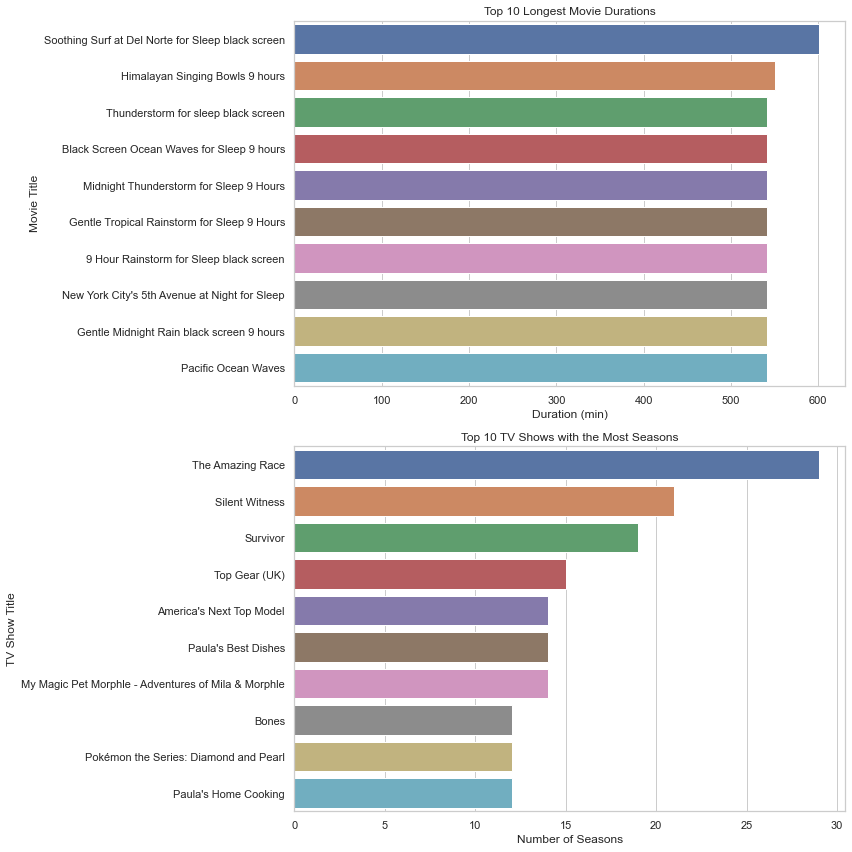

In [ ]:
# Filter data for movies and TV shows separately
df_movies = data[data['type'] == 'Movie'].copy()
df_tv_shows = data[data['type'] == 'TV Show'].copy()

# Extract numeric duration for movies
df_movies['duration_num'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(float)

# Extract numeric duration for TV shows
df_tv_shows['duration_num'] = df_tv_shows['duration'].str.extract('(\d+)', expand=False).astype(float)

# Plotting
plt.figure(figsize=(12, 12))

# Subplot 1: Top 10 Longest Movie Duration
plt.subplot(2, 1, 1)
sns.barplot(data=df_movies.sort_values(by='duration_num', ascending=False).head(10), y='title', x='duration_num', orient='horizontal')
plt.title('Top 10 Longest Movie Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Movie Title')

# Subplot 2: Top 10 TV Shows with the Most Seasons
plt.subplot(2, 1, 2)
sns.barplot(data=df_tv_shows.sort_values(by='duration_num', ascending=False).head(10), y='title', x='duration_num', orient='horizontal')
plt.title('Top 10 TV Shows with the Most Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('TV Show Title')

plt.tight_layout()
plt.show()

In [ ]:
data['country'].value_counts()

Unavailable                                             8996
United States                                            253
India                                                    229
United Kingdom                                            28
Canada                                                    16
                                                        ... 
United States, Thailand                                    1
France, Belgium                                            1
Denmark, United Kingdom, Czech Republic, Netherlands       1
United States, Ireland                                     1
United States, France, Denmark                             1
Name: country, Length: 87, dtype: int64

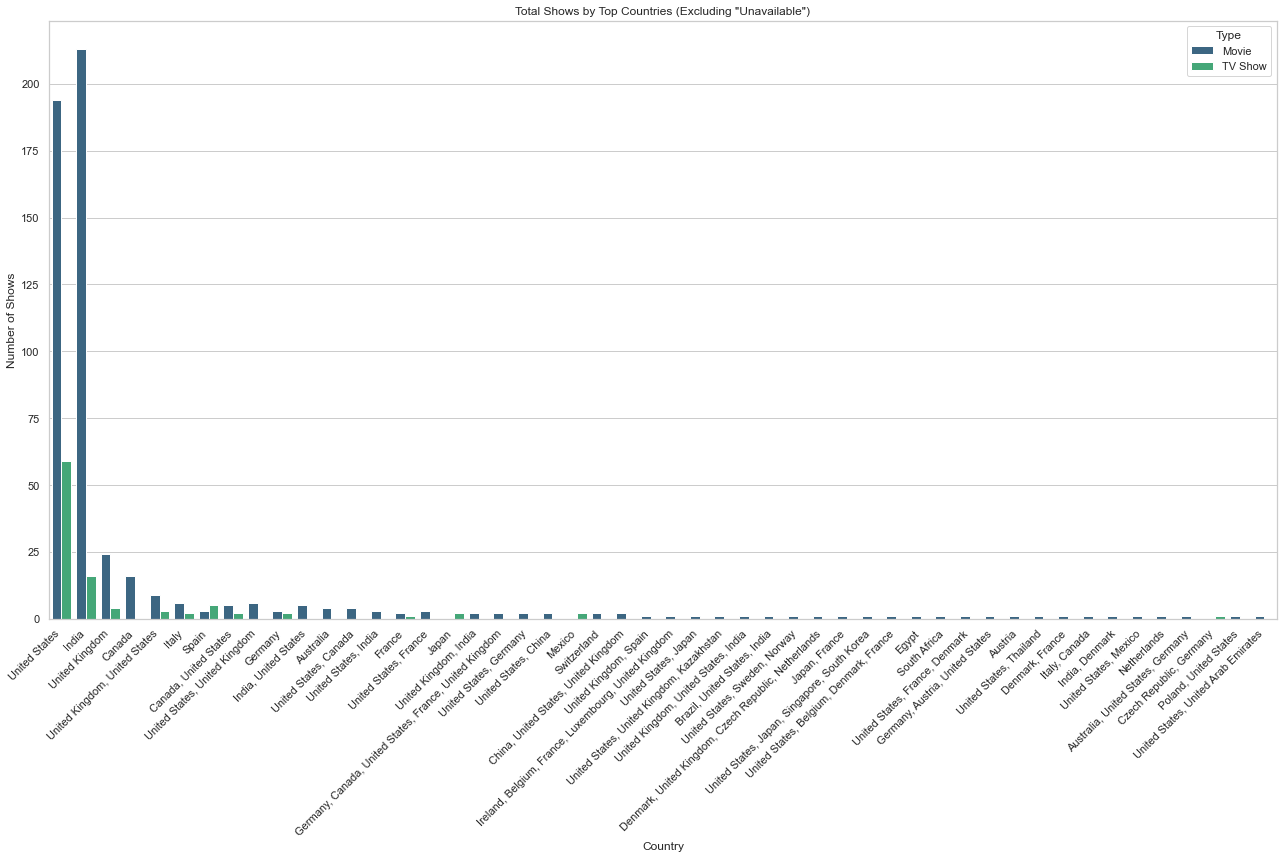

In [ ]:
filtered_data = data[data['country'] != 'Unavailable']

# Top N countries excluding "unavailable"
top_countries = filtered_data['country'].value_counts().head(50).index

# Filter the data for the top countries
filtered_data = filtered_data[filtered_data['country'].isin(top_countries)]

# Visualize the total shows by country for the top countries
plt.figure(figsize=(22, 11))
sns.countplot(x='country', data=filtered_data, hue='type', order=top_countries, palette='viridis')
plt.title('Total Shows by Top Countries (Excluding "Unavailable")')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.legend(title='Type', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

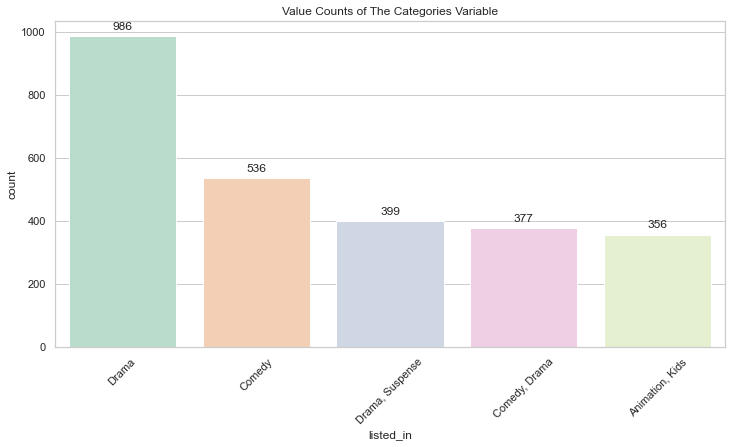

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Value Counts of The Categories Variable")
sns.set(style="darkgrid")
ax = sns.countplot(x="listed_in", data=data, palette="Pastel2", order=data["listed_in"].value_counts().iloc[:5].index)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

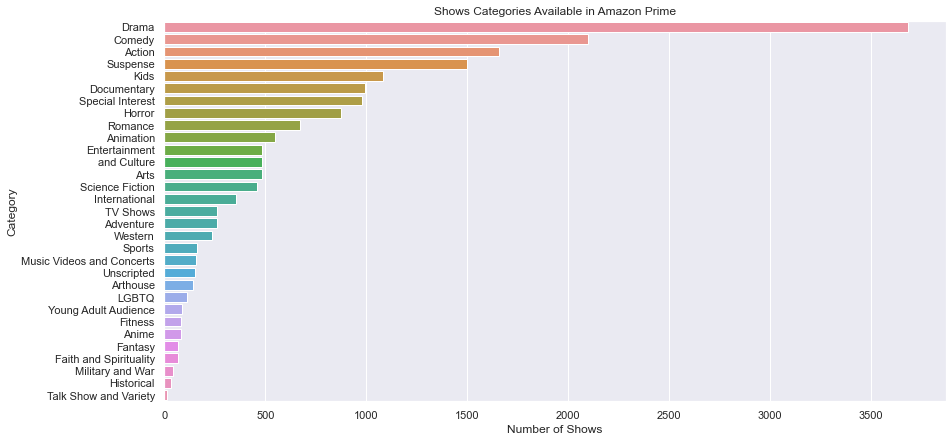

In [ ]:
df_barh = data['listed_in'].str.split(', ').explode().value_counts()
plt.figure(figsize=(14,7))
sns.barplot(y=df_barh.index,x=df_barh.values,orient='horizontal')
plt.ylabel('Category')
plt.xlabel('Number of Shows')
plt.title('Shows Categories Available in Amazon Prime')
plt.show()


# **Conclusion**

This exploratory data analysis of Amazon Prime's content library reveals several interesting patterns and insights. The platform features a significantly higher number of movies compared to TV shows. A small group of directors and actors contribute to a large portion of the content, indicating recurring collaborations. The genres of drama, comedy, and action are the most prominent, reflecting viewer preferences. Content production has steadily increased over the years, peaking in the 2010s. Most shows originate from a few key countries, notably the United States, India, and the United Kingdom. The distribution of ratings shows a focus on content suitable for general and teenage audiences. Overall, Amazon Prime offers a diverse and expanding catalog, tailored to varied audience interests across regions and age groups.